In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop


In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt

In [3]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [4]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


In [5]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 11s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 


In [7]:
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# network

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])


In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [12]:
datagen.fit(X_train)

In [13]:
# train
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)


Epoch 1/20
313/313 [==============================] - 140s 448ms/step - loss: 1.9700 - accuracy: 0.2677 - val_loss: 1.6505 - val_accuracy: 0.3845
Epoch 2/20
313/313 [==============================] - 141s 451ms/step - loss: 1.6394 - accuracy: 0.3986 - val_loss: 1.5142 - val_accuracy: 0.4434
Epoch 3/20
313/313 [==============================] - 141s 451ms/step - loss: 1.4767 - accuracy: 0.4609 - val_loss: 1.3578 - val_accuracy: 0.5005
Epoch 4/20
313/313 [==============================] - 141s 452ms/step - loss: 1.3589 - accuracy: 0.5094 - val_loss: 1.2032 - val_accuracy: 0.5732
Epoch 5/20
313/313 [==============================] - 141s 452ms/step - loss: 1.2765 - accuracy: 0.5425 - val_loss: 1.1851 - val_accuracy: 0.5749
Epoch 6/20
313/313 [==============================] - 142s 455ms/step - loss: 1.2066 - accuracy: 0.5720 - val_loss: 1.1335 - val_accuracy: 0.5945
Epoch 7/20
313/313 [==============================] - 143s 458ms/step - loss: 1.1556 - accuracy: 0.5921 - val_loss: 1.1299 -

In [14]:
#model.fit_generator(datagen.flow(X_train, Y_train,
#                        batch_size=BATCH_SIZE),
#                        samples_per_epoch=X_train.shape[0],
#                        nb_epoch=NB_EPOCH, 
#                        verbose=VERBOSE)

#server.launch(model)


print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Testing...
79/79 [==============================] - 8s 104ms/step - loss: 0.8662 - accuracy: 0.6987

Test score: 0.866243839263916
Test accuracy: 0.6987000107765198


In [16]:
#save model
model_json = model.to_json()
open('CIFAR_Keras_CNN_improvedModel_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


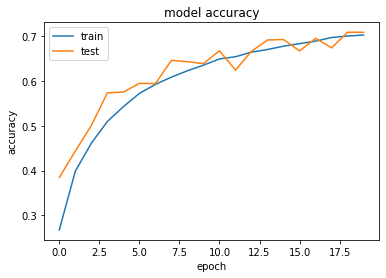

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

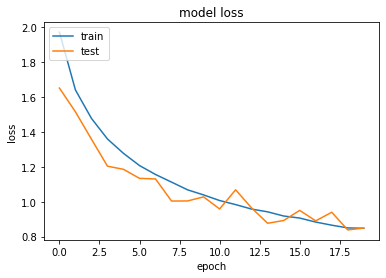

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()